# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric" 

    #  Check city_url - print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response=requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | howrah
Processing Record 2 of Set 1 | maine soroa
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | iquique
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | lihue
Processing Record 11 of Set 1 | hobyo
Processing Record 12 of Set 1 | st. john's
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | chiili
City not found. Skipping...
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | bubaque
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,howrah,22.5892,88.3103,39.07,29,2,3.63,IN,1714189405
1,maine soroa,13.2114,12.0241,29.41,15,99,2.24,NE,1714189406
2,lompoc,34.6391,-120.4579,12.64,87,46,8.20,US,1714189318
3,iquique,-20.2208,-70.1431,18.33,83,59,0.45,CL,1714189407
4,blackmans bay,-43.0167,147.3167,14.89,61,53,1.43,AU,1714189251


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howrah,22.5892,88.3103,39.07,29,2,3.63,IN,1714189405
1,maine soroa,13.2114,12.0241,29.41,15,99,2.24,NE,1714189406
2,lompoc,34.6391,-120.4579,12.64,87,46,8.20,US,1714189318
3,iquique,-20.2208,-70.1431,18.33,83,59,0.45,CL,1714189407
4,blackmans bay,-43.0167,147.3167,14.89,61,53,1.43,AU,1714189251


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

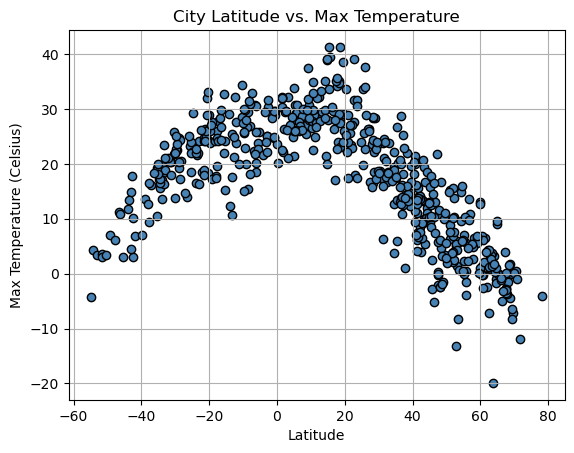

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],marker="o",facecolor="steelblue",edgecolor="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (Celsius)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

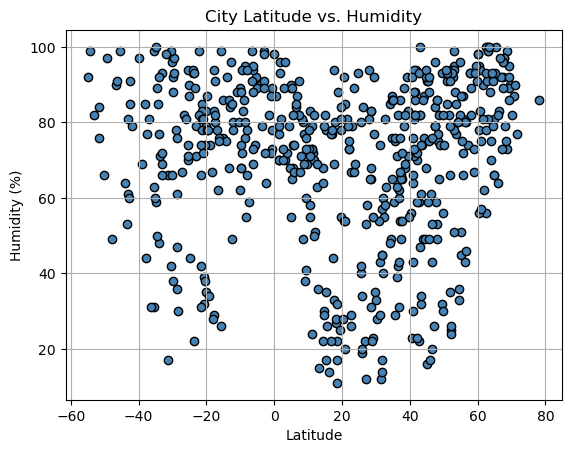

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],marker="o",facecolor="steelblue",edgecolor="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

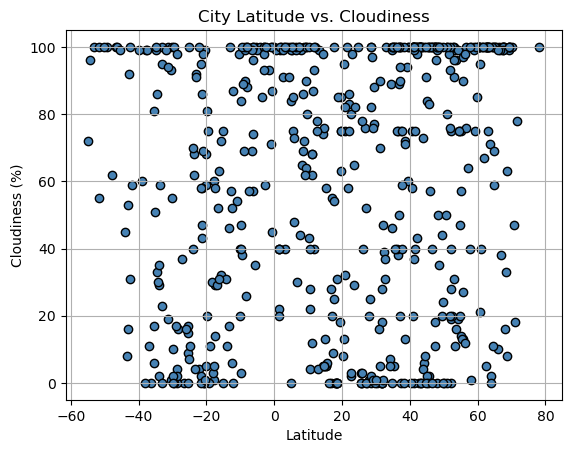

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],marker="o",facecolor="steelblue",edgecolor="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

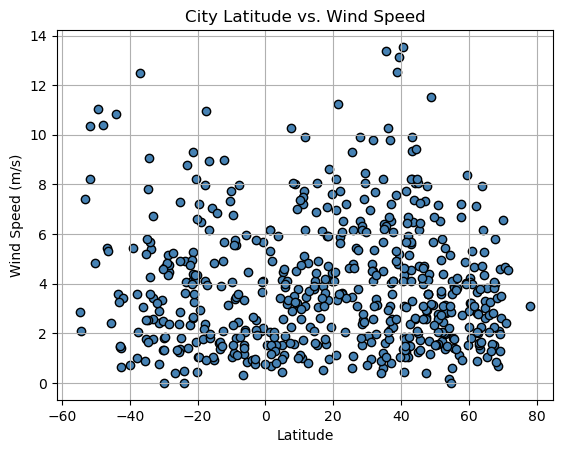

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],marker="o",facecolor="steelblue",edgecolor="black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_values, y_values, title, y_label, place_regressionline_equation):
    (slope, intercept, rvalue,_,_) = linregress(df[x_values], df[y_values])
    df['regress_values']=df[x_values]* slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    df.plot(kind='scatter', x=x_values, y=y_values, title=title)
    plt.plot(df[x_values],  df['regress_values'], "r-")
    plt.annotate(line_eq,place_regressionline_equation,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howrah,22.5892,88.3103,39.07,29,2,3.63,IN,1714189405
1,maine soroa,13.2114,12.0241,29.41,15,99,2.24,NE,1714189406
2,lompoc,34.6391,-120.4579,12.64,87,46,8.20,US,1714189318
6,saipan,15.1355,145.7010,27.89,78,5,8.07,MP,1714189409
8,lihue,21.9789,-159.3672,23.34,73,83,5.89,US,1714189410


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,iquique,-20.2208,-70.1431,18.33,83,59,0.45,CL,1714189407
4,blackmans bay,-43.0167,147.3167,14.89,61,53,1.43,AU,1714189251
5,saint-philippe,-21.3585,55.7679,25.37,85,58,5.27,RE,1714189408
7,edinburgh of the seven seas,-37.0676,-12.3116,16.05,81,11,12.49,SH,1714189302
11,grytviken,-54.2811,-36.5092,4.35,99,96,2.10,GS,1714189249


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.771104303854586


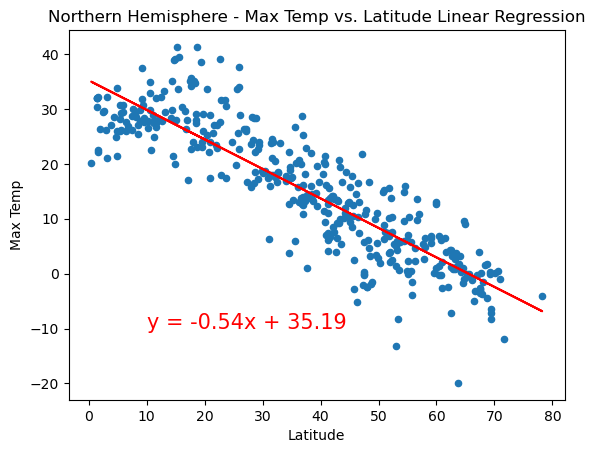

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp',
                       'Northern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'Max Temp', (10, -10))

The r-squared is: 0.5479594404860717


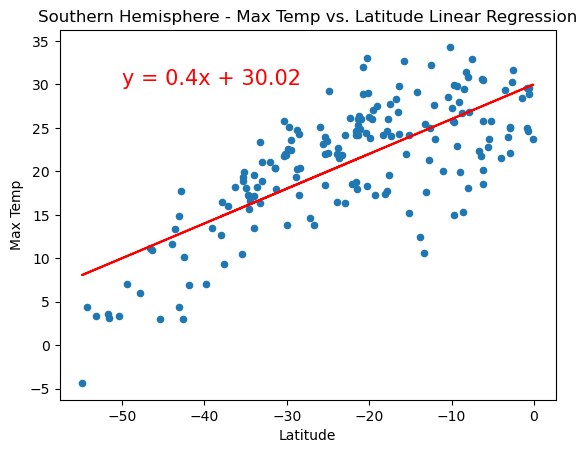

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp',
                       'Southern Hemisphere - Max Temp vs. Latitude Linear Regression',
                       'Max Temp', (-50, 30))

**Discussion about the linear relationship:** 
 - Northern Hemisphere, when the latitude increases, the max temperature decreases, represents in the negative slope -0.54. The r value is greater than 0.7 indicates a strong correlation between the latitude and max temp. 
- Southern Hemisphere, when the latitude increases, the max temperature increases, represents in the positive slope 0.4. The r value is slightly greater than 0.5 indicates a moderate correlation between the latitude and max temp. There might be other factors influence the temperature as well. 
Both findings are matching with geographical expectations.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07317427062182909


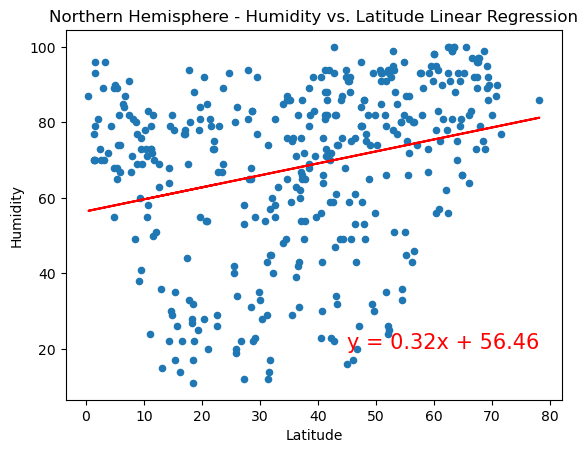

In [31]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity',
                       'Northern Hemisphere - Humidity vs. Latitude Linear Regression',
                       'Humidity', (45, 20))

The r-squared is: 0.01010704362439497


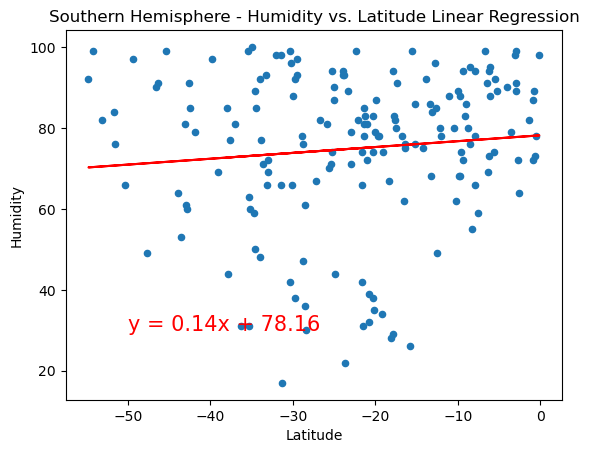

In [32]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity',
                       'Southern Hemisphere - Humidity vs. Latitude Linear Regression',
                       'Humidity', (-50, 30))

**Discussion about the linear relationship:** 
- Northern Hemisphere, the r value is only 0.07 which indicates very weak correlations between latitude and humidity. The positive slope 0.32 shows when the latitude increases, there are slightly increase of the humidity. 
- Southern Hemisphere, the r value is only 0.01 which indicates nearly no correlations between latitude and humidity. The positive slope 0.14 shows when the latitude increases, there are very minimal increase of the humidity.
Both findings explain the humidity level is not only decided by latitude factor, but there are also definitely more factors contribute to the final humidity level.



### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01841510753626467


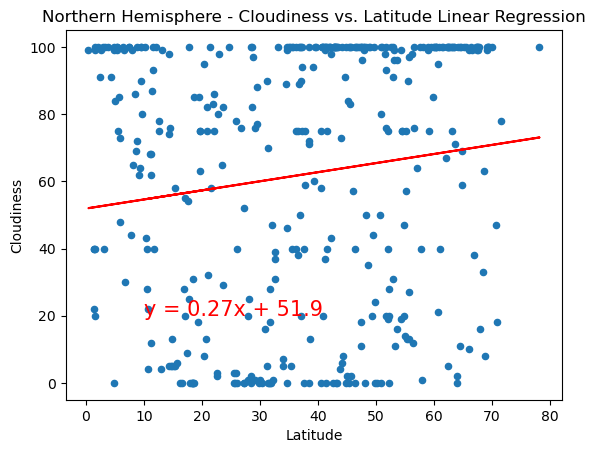

In [33]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness',
                       'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                       'Cloudiness', (10, 20))

The r-squared is: 0.00981815858414013


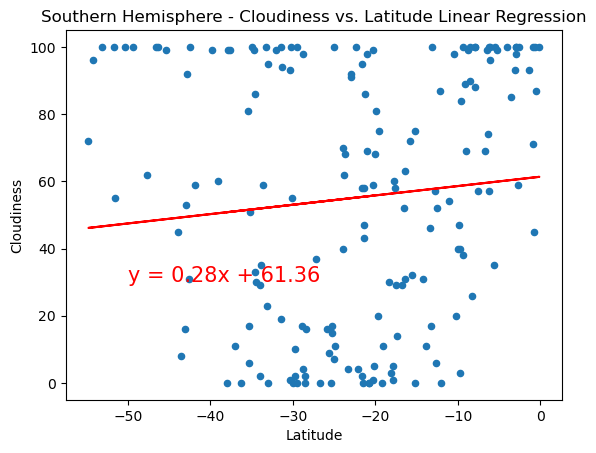

In [34]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness',
                       'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression',
                       'Cloudiness', (-50, 30))

**Discussion about the linear relationship:** 
- Northern Hemisphere, the r value is only 0.018 means almost no correlations between latitude and cloudiness. It is a positive slope 0.27, as latitude increases, the cloudiness has minor increases.
- Southern Hemisphere, the r value is nearly 0 could say there is no correlation between latitude and cloudiness. Even though it is a positive slope 0.28, the tendency of the increase level between the latitude and cloudiness is not obviously. 
As you can see the individual data points spread all over the places, there is no strong relations between the latitude and Cloudiness for both Northern and Southern. We need consider more factors influence the cloudiness. 


### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.007215571957685138


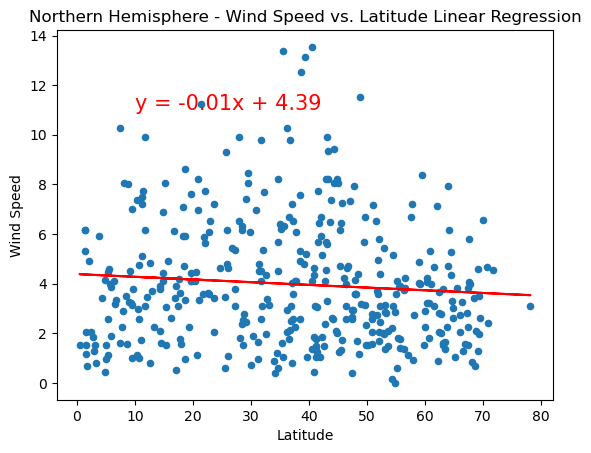

In [35]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Wind Speed',
                       'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                       'Wind Speed', (10, 11))

The r-squared is: 0.034783282117720735


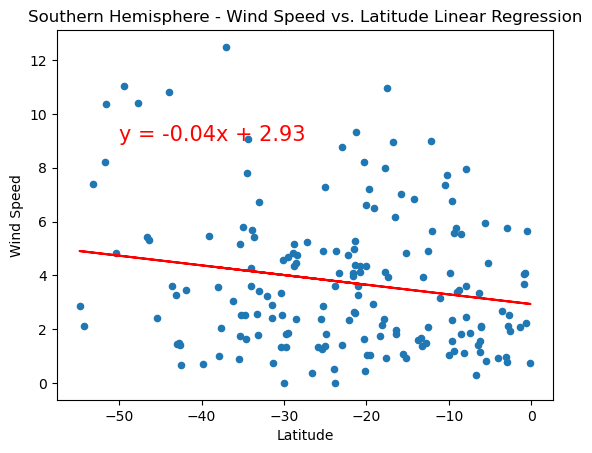

In [36]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Wind Speed',
                       'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression',
                       'Wind Speed', (-50,9))

**Discussion about the linear relationship:** 
- Northern Hemisphere, the r value is only 0.007 means almost no correlations between latitude and wind speed. It is a negative slop -0.01, which presents nearly no relations between the latitude and wind speed.
- Southern Hemisphere, the r value is only 0.035 means nearly no correlations between latitude and wind speed. It is a negative slop -0.04, which presents nearly no relations between the latitude and wind speed.
Both suggests that latitude does not strongly influence wind speed.

**Discussion about final findings:**
As above, we have compared liner relationship for both Northern and Southern Hemisphere's latitude with Temperature, Humidity, Cloudiness and Wind Speed. The strongest relationship with the latitude is temperature. We need include more factors when consider the relationship with the other three.